In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ankita vasnani\AppData\Local\Temp\ipykernel_3700\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
data = pd.read_csv("C:/Users/Ankita vasnani/Downloads/Python_Diwali_Sales_Analysis-main/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv", encoding = "unicode_escape")
# df = pd.DataFrame(data)
# print(df)
# print(df.head(10))
print(data)
print()



       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [14]:
# drop unrelated columns
data.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [13]:
print(data.Status)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11246   NaN
11247   NaN
11248   NaN
11249   NaN
11250   NaN
Name: Status, Length: 11251, dtype: float64


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB
None


In [19]:
# check null values
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [18]:
data.dropna(inplace=True)

In [21]:
# changing data type
data["Amount"] = data["Amount"].astype("int")

In [22]:
data["Amount"].dtype

dtype('int32')

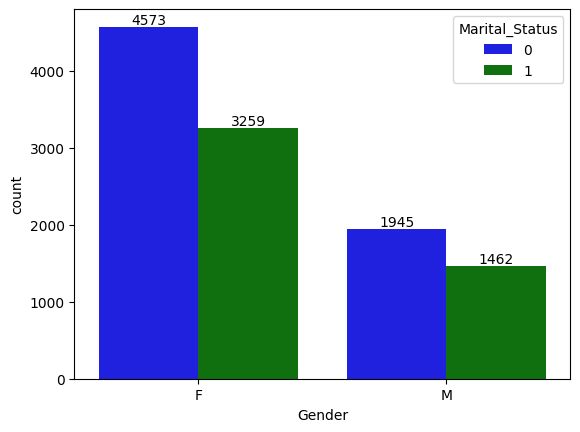

In [45]:
import matplotlib.pyplot as plt
color = {"F":"blue", "M":"green"}
a = sns.countplot(data = data, x = "Gender", palette = color.values(), hue = "Marital_Status")
for bars in a.containers:
    a.bar_label(bars)



In [35]:
grouped_by = data.groupby(["Gender"]).agg({"Amount":"sum"}).sort_values(by = "Amount", ascending = False)
print(grouped_by)

          Amount
Gender          
F       74335853
M       31913276


<Axes: xlabel='Gender', ylabel='Amount'>

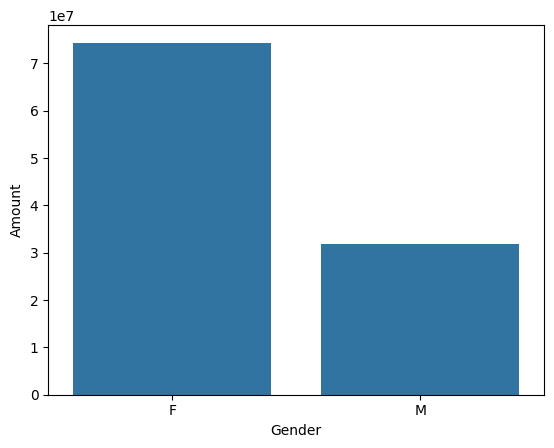

In [36]:
sns.barplot(data = grouped_by, x = "Gender", y = "Amount")

In [37]:
# most of the buyers are female

In [ ]:
# Age

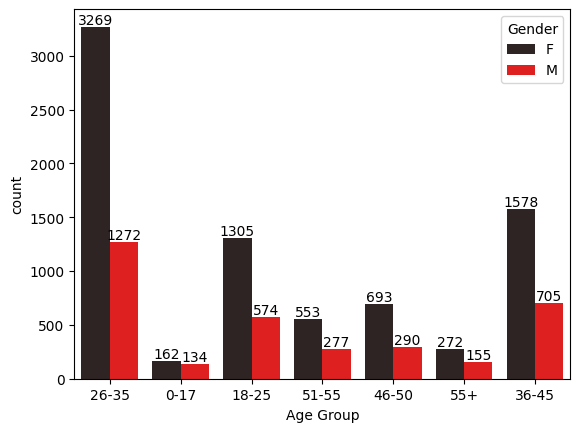

In [49]:
import matplotlib.pyplot as plt
a = sns.countplot(data = data, x = "Age Group", hue ="Gender", palette = "dark:red")
for bars in a.containers:
    a.bar_label(bars)
plt.show()

In [18]:
# Total Amount vs Age Group
grouped_by = data.groupby("Age Group").agg({"Amount":"sum"}).sort_values(by ="Amount", ascending = False)
print(grouped_by)

                Amount
Age Group             
26-35      42613443.94
36-45      22144995.49
18-25      17240732.00
46-50       9207844.00
51-55       8261477.00
55+         4080987.00
0-17        2699653.00


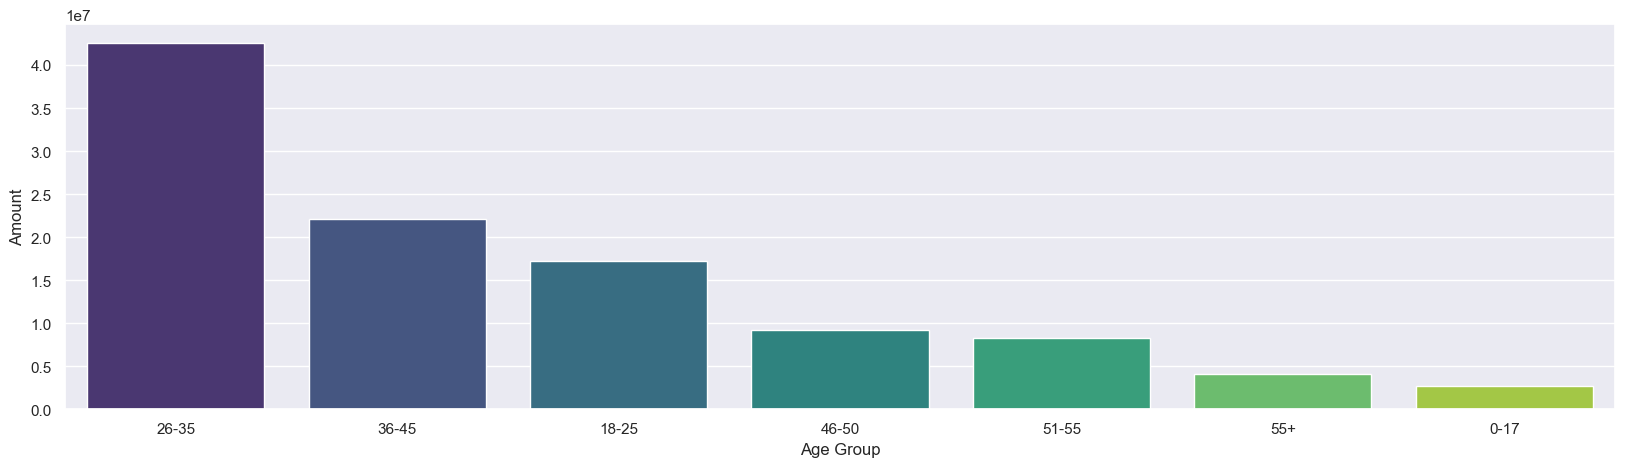

In [21]:
a = sns.barplot(data = grouped_by, x ="Age Group", y = "Amount",hue = "Age Group",palette = "viridis")
plt.show()

In [60]:
# from the above graph most of the buyers are of age group 26-35

In [ ]:
# state -> total no. of orders state wise

In [62]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

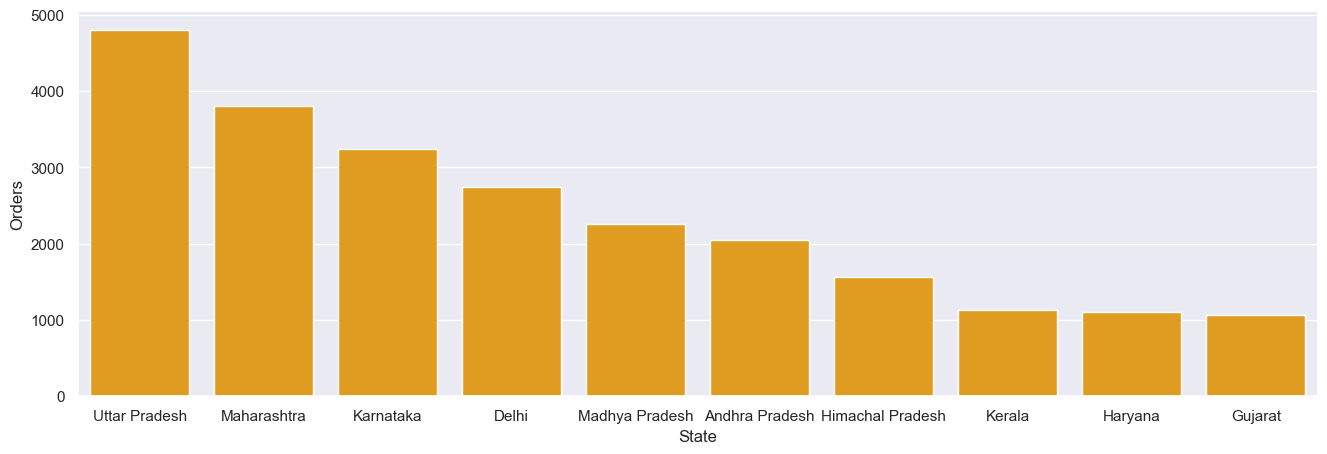

In [78]:
grouped_by = data.groupby("State").agg({"Orders":"sum"}).sort_values(by ="Orders", ascending=False).head(10)
sns.set(rc = {"figure.figsize":(16,5)})
a = sns.barplot(data = grouped_by, x = "State", y = "Orders", color = "orange")
plt.show()

In [ ]:
# total amount/sales from top 10 states

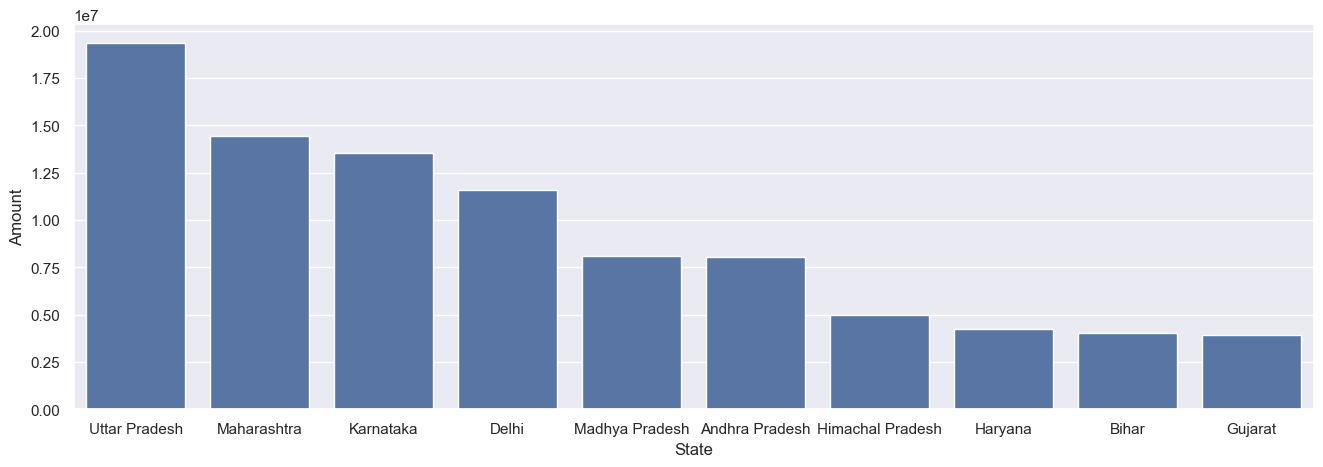

In [71]:
grouped_by = data.groupby("State").agg({"Amount":"sum"}).sort_values(by ="Amount", ascending=False).head(10)
sns.set(rc = {"figure.figsize":(16,5)})
a = sns.barplot(data = grouped_by, x = "State", y = "Amount")
plt.show()

In [ ]:
# most of the orders and total amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

In [73]:
# Marital Status

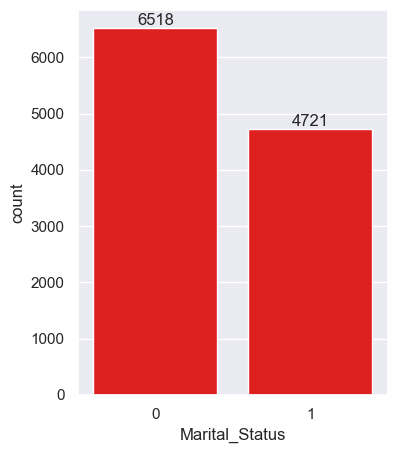

In [86]:
a = sns.countplot( data = data ,x = "Marital_Status",color = "red")
sns.set(rc = {"figure.figsize":(6,5)})
for bars in a.containers:
    a.bar_label(bars)

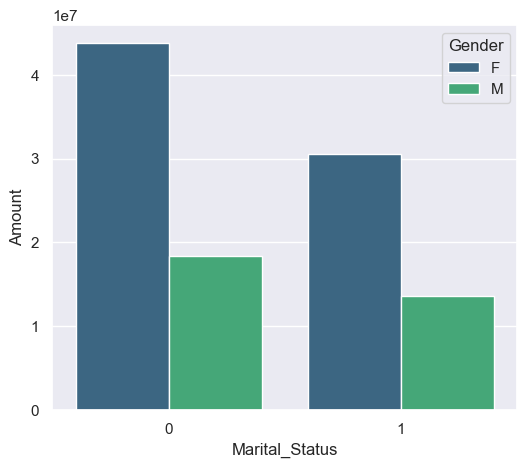

In [81]:
sales_state = data.groupby(["Marital_Status", "Gender"], as_index=False).agg({"Amount":"sum"}).sort_values(by = "Amount", ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = "Marital_Status", y = "Amount", hue = "Gender", palette = "viridis")
plt.show()




In [ ]:
# above graph most of the buyers are women and they have high purchasing power

In [88]:
# occupation

In [89]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

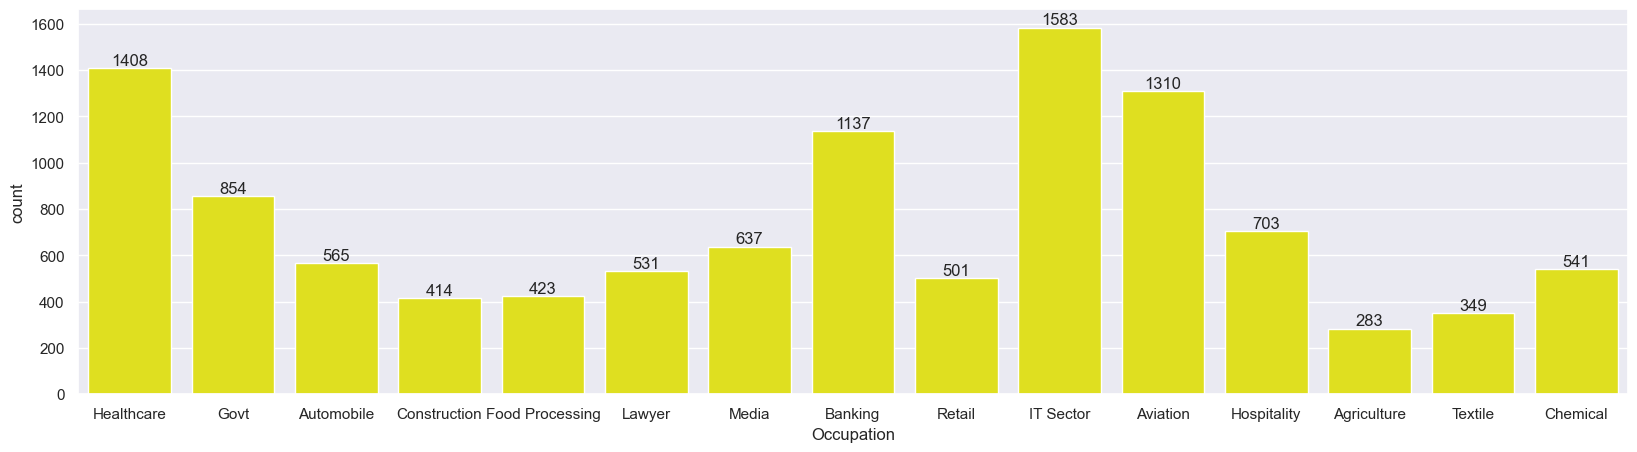

In [100]:
a = sns.countplot(data = data, x = "Occupation", color = "yellow")
sns.set(rc = {'figure.figsize':(25,5)})
for bars in a.containers:
    a.bar_label(bars)
    plt.show()

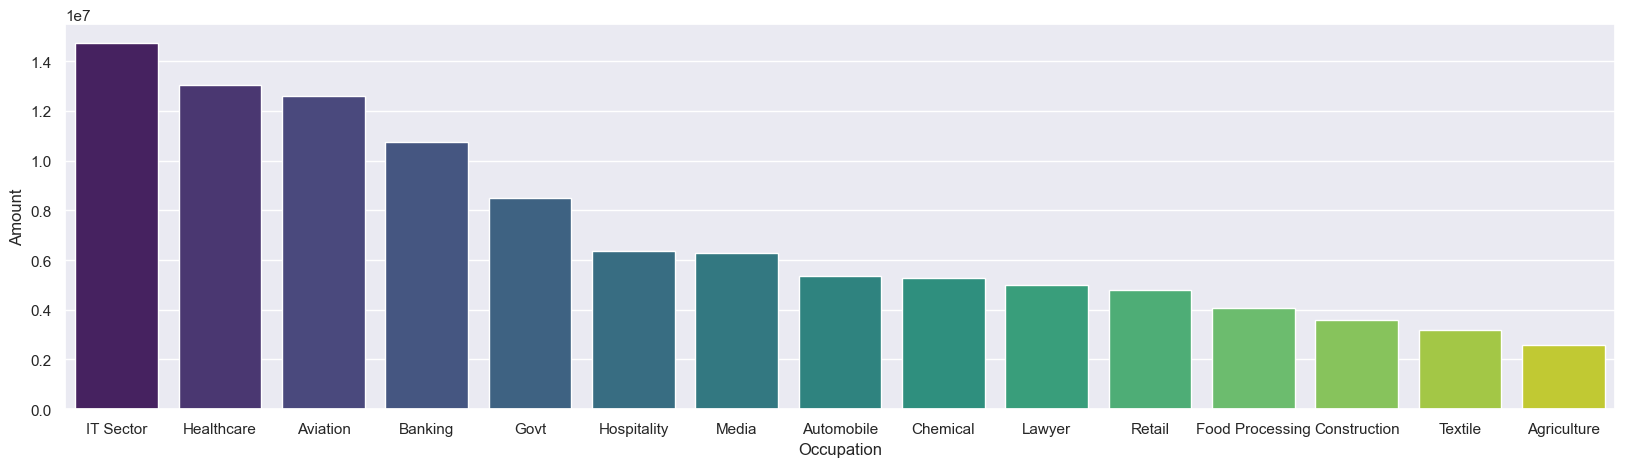

In [16]:
sales_occ = data.groupby(["Occupation"], as_index = False).agg({"Amount":"sum"}).sort_values(by = "Amount", ascending = False)
sns.set(rc = {"figure.figsize":(20,5)})
a = sns.barplot(data = sales_occ, x = "Occupation", y = "Amount",hue = "Occupation", palette = "viridis")
plt.show()

In [ ]:
# most of the buyers are working in IT, Aviation and Healthcare sector

In [93]:
# product category

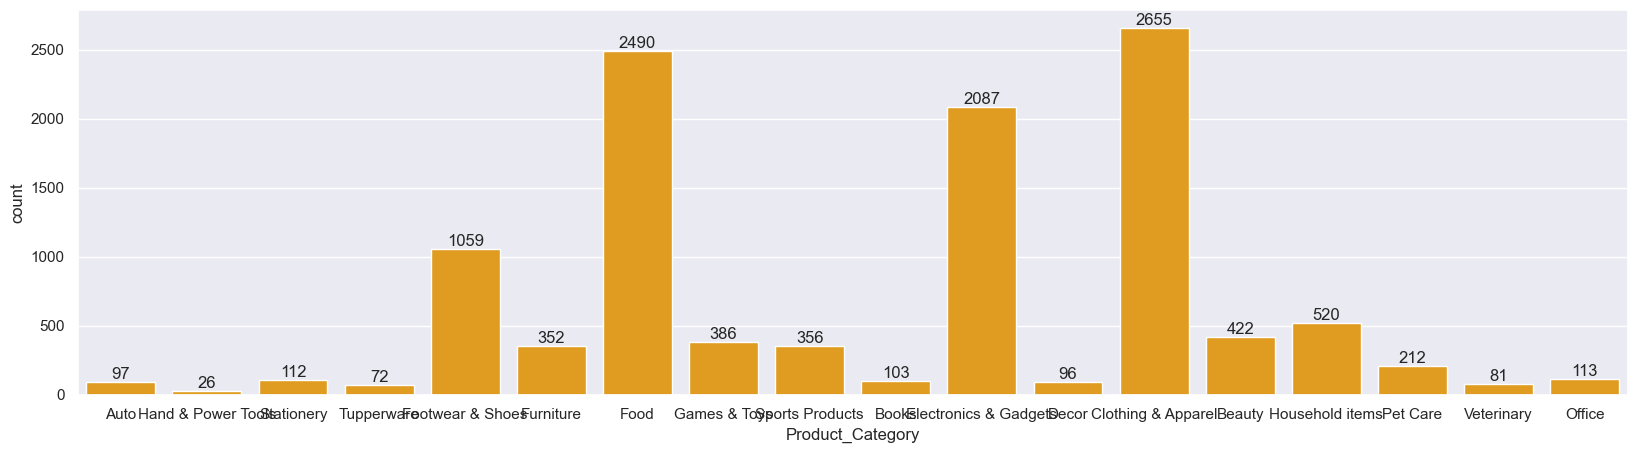

In [102]:
sns.set(rc = {"figure.figsize":(20,5)})
a = sns.countplot(data = data, x = "Product_Category", color = "orange")
for bars in a.containers:
    a.bar_label(bars)
plt.show()

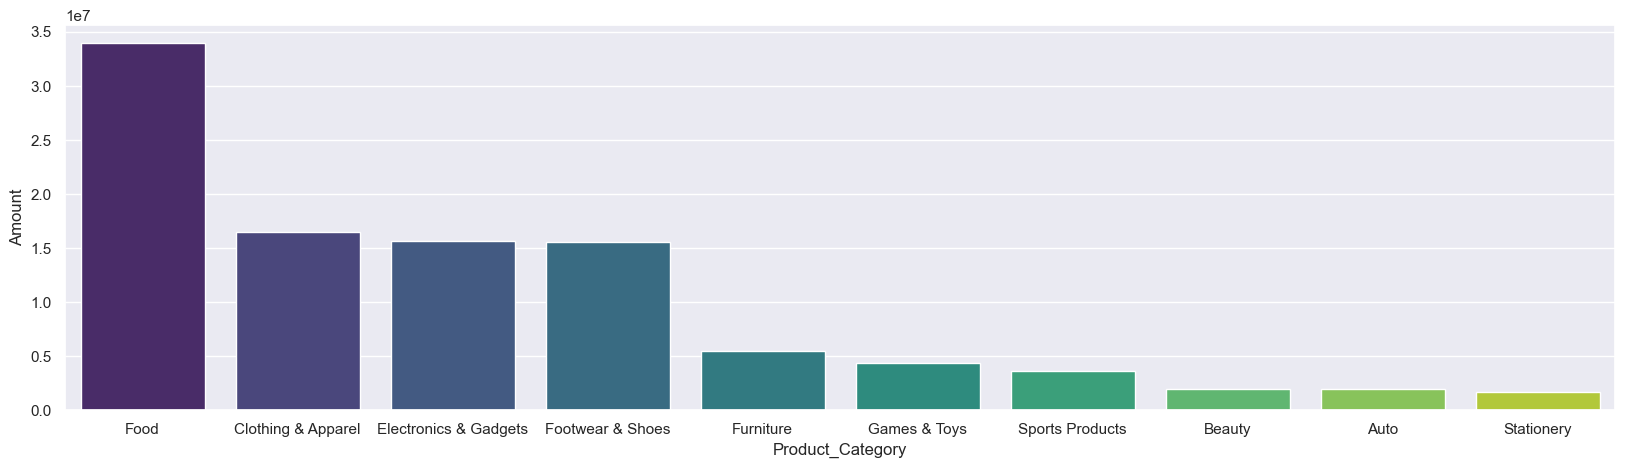

In [25]:

sales_productCatg = data.groupby(["Product_Category"], as_index=False).agg({"Amount":"sum"}).sort_values(by = "Amount", ascending = False).head(10)
sns.barplot(data = sales_productCatg, x = "Product_Category", y = "Amount",hue="Product_Category", palette = "viridis")
sns.set(rc = {"figure.figsize":(20,10)})
plt.show()

In [105]:
# most of the sold products are from food, clothing and electronics categorys

In [22]:
# product_id , top selling products

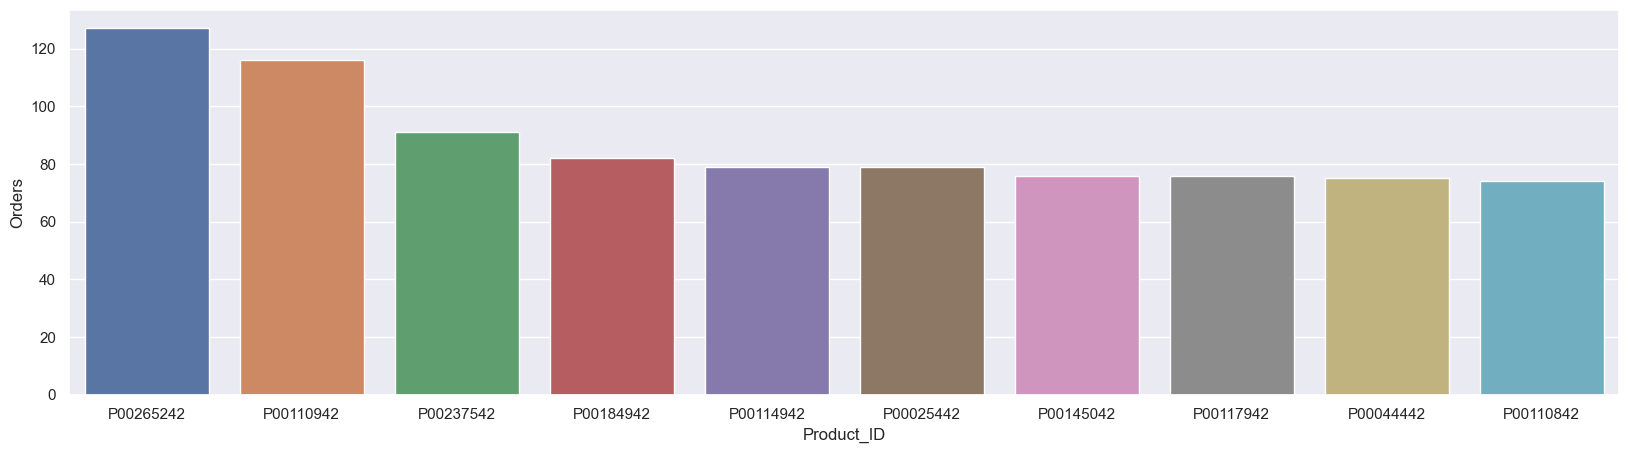

In [24]:
sales_ProdId = data.groupby("Product_ID").agg({"Orders":"sum"}).sort_values(by = "Orders", ascending = False).head(10)
sns.barplot(data = sales_ProdId, x = "Product_ID", y = "Orders", hue = "Product_ID", palette = "deep" )
sns.set(rc = {"figure.figsize":(20,5)})
plt.show()

In [ ]:
# conclusion
Married women age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and aviatiom 
are more likely to buy products from food, clothing and electronics category
